In [20]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

In [21]:
np.random.seed(0)

In [22]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()
print(X_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [23]:
assert(X_train.shape[0]==y_train.shape[0]), "The number of datasets is not equal to the number of labels"
assert(X_test.shape[0]==y_test.shape[0]), "The number of datasets is not equal to the number of labels"
assert(X_train.shape[1:]==(28,28)), "The number of pixels are not same"
assert(X_test.shape[1:]==(28,28)), "The number of pixels are not same"

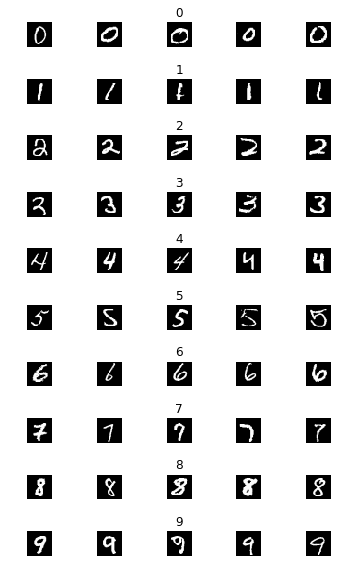

In [28]:
num_of_samples = []
n_class=10
cols = 5
fig,axs = plt.subplots(nrows=n_class, ncols=cols, figsize=(5,8))
fig.tight_layout()
for i in range(cols):
    for j in range(n_class):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0,len(x_selected-1)),:, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i==2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of samples')

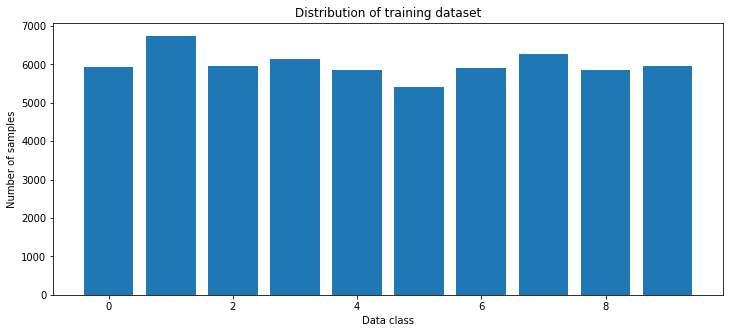

In [33]:
print(num_of_samples)
plt.figure(figsize=(12,5))
plt.bar(range(0,n_class),num_of_samples)
plt.title("Distribution of training dataset")
plt.xlabel("Data class")
plt.ylabel("Number of samples")

In [34]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)
X_train=X_train/255
X_test=X_test/255

In [39]:
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0],num_pixels)
X_test = X_test.reshape(X_test.shape[0],num_pixels)
print(X_train.shape,X_test.shape)

(60000, 784) (10000, 784)


In [43]:
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim = num_pixels, activation = 'relu'))
    model.add(Dense(30, activation = 'relu'))
    model.add(Dense(10, activation = 'relu'))
    model.add(Dense(n_class, activation = 'softmax'))
    model.compile(Adam(lr=0.01),loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [44]:
model = create_model()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_6 (Dense)              (None, 30)                330       
_________________________________________________________________
dense_7 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_8 (Dense)              (None, 10)                110       
Total params: 8,600
Trainable params: 8,600
Non-trainable params: 0
_________________________________________________________________
None


In [45]:
h = model.fit(X_train,y_train, validation_split=0.1,epochs=10,batch_size=200,verbose=1,shuffle=1)

W0904 02:45:38.452963 11536 deprecation.py:323] From C:\Users\Anas Khan\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0904 02:45:38.515459 11536 deprecation_wrapper.py:119] From C:\Users\Anas Khan\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 3s 55us/step - loss: 0.4933 - acc: 0.8494 - val_loss: 0.2281 - val_acc: 0.9330
Epoch 2/10
54000/54000 [==============================] - 1s 18us/step - loss: 0.2618 - acc: 0.9229 - val_loss: 0.2000 - val_acc: 0.9385
Epoch 3/10
54000/54000 [==============================] - 1s 18us/step - loss: 0.2320 - acc: 0.9314 - val_loss: 0.1904 - val_acc: 0.9423
Epoch 4/10
54000/54000 [==============================] - 1s 18us/step - loss: 0.2154 - acc: 0.9358 - val_loss: 0.1957 - val_acc: 0.9443
Epoch 5/10
54000/54000 [==============================] - 2s 30us/step - loss: 0.1999 - acc: 0.9406 - val_loss: 0.1818 - val_acc: 0.9493
Epoch 6/10
54000/54000 [==============================] - 1s 26us/step - loss: 0.1956 - acc: 0.9422 - val_loss: 0.1757 - val_acc: 0.9507
Epoch 7/10
54000/54000 [==============================] - 1s 25us/step - loss: 0.1899 - acc: 0.9435 - val_loss: 0.1685 - val_acc:

Text(0.5, 0, 'epoch')

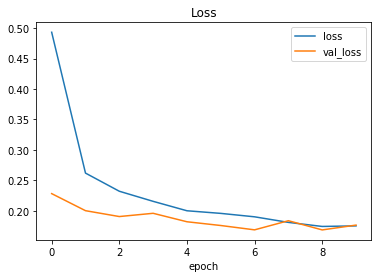

In [46]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

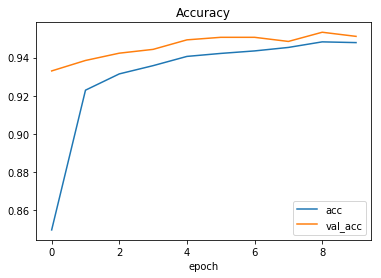

In [47]:
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [48]:
score=model.evaluate(X_test,y_test,verbose=0)
print(type(score))
print('Test score:',score[0])
print('Test accuracy:',score[1])

<class 'list'>
Test score: 0.20102297775149344
Test accuracy: 0.9432


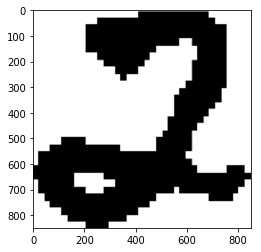

In [52]:
import requests
from PIL import Image
url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

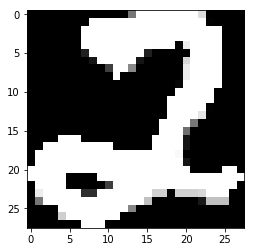

In [53]:
import cv2
img = np.asarray(img)
img=cv2.resize(img,(28,28))
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img=cv2.bitwise_not(img)
plt.imshow(img,cmap=plt.get_cmap('gray'))

In [54]:
img=img/255
img=img.reshape(1,784)

In [57]:
prediction = model.predict_classes(img)
print('Prediction is:',str(prediction))

Prediction is: [3]
